# Analysis - exp6

A wythoff stumbler hyper-parameter search.

In [2]:
import os
import csv
import numpy as np
import torch as th

from glob import glob
from pprint import pprint

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Find the files
path = "/Users/type/Code/azad/data/wythoff/exp6/"
results_path = "/Users/type/Code/azad/data/wythoff/"

files = sorted(glob(os.path.join(path, "run_*")))
files[:10]

['/Users/type/Code/azad/data/wythoff/exp6/run_0.pkl',
 '/Users/type/Code/azad/data/wythoff/exp6/run_1.pkl',
 '/Users/type/Code/azad/data/wythoff/exp6/run_10.pkl',
 '/Users/type/Code/azad/data/wythoff/exp6/run_100.pkl',
 '/Users/type/Code/azad/data/wythoff/exp6/run_101.pkl',
 '/Users/type/Code/azad/data/wythoff/exp6/run_102.pkl',
 '/Users/type/Code/azad/data/wythoff/exp6/run_103.pkl',
 '/Users/type/Code/azad/data/wythoff/exp6/run_104.pkl',
 '/Users/type/Code/azad/data/wythoff/exp6/run_105.pkl',
 '/Users/type/Code/azad/data/wythoff/exp6/run_106.pkl']

In [4]:
# Process 'em
table = []
for fi in files:
    # Extract row_code
    row_code = int(os.path.split(fi)[-1].split('_')[-1].split('.')[0])
    
    # Load data
    model = th.load(fi)
    row = (
        row_code, 
        model['gamma'], 
        model['epsilon'], 
        model['learning_rate_stumbler'],
        model['stumbler_score']
    ) 
    table.append(row)
    
pprint(table[:20])

[(0, 0.1, 1.0, 0.01, 0.4751287445824403),
 (1, 0.1, 1.0, 0.12, 0.5700107578122316),
 (10, 0.2, 1.0, 0.01, 0.5624176124864656),
 (100, 0.1, 0.9, 0.01, 0.5115844554944687),
 (101, 0.1, 0.9, 0.12, 0.600716606444242),
 (102, 0.1, 0.9, 0.23, 0.6396802460834063),
 (103, 0.1, 0.9, 0.34, 0.6625260510011927),
 (104, 0.1, 0.9, 0.45, 0.7020462222663207),
 (105, 0.1, 0.9, 0.56, 0.694530704869172),
 (106, 0.1, 0.9, 0.67, 0.724779675044916),
 (107, 0.1, 0.9, 0.78, 0.7286484634154186),
 (108, 0.1, 0.9, 0.89, 0.7402250984462282),
 (109, 0.1, 0.9, 1.0, 0.7637176188158659),
 (11, 0.2, 1.0, 0.12, 0.6614216302422705),
 (110, 0.2, 0.9, 0.01, 0.5531155546890869),
 (111, 0.2, 0.9, 0.12, 0.6535127947406565),
 (112, 0.2, 0.9, 0.23, 0.7140816524037428),
 (113, 0.2, 0.9, 0.34, 0.6813776337496182),
 (114, 0.2, 0.9, 0.45, 0.7014742433640557),
 (115, 0.2, 0.9, 0.56, 0.6869919719442005)]


In [5]:
# Sort by score
def get_score(row):
    return row[-1]

table = sorted(table, key=get_score, reverse=True)
pprint(table[:20])

[(959, 0.6, 0.1, 1.0, 0.8746876102257231),
 (839, 0.4, 0.2, 1.0, 0.8607407642074675),
 (819, 0.2, 0.2, 1.0, 0.8515477737012811),
 (708, 0.1, 0.3, 0.89, 0.8503569586514474),
 (847, 0.5, 0.2, 0.78, 0.8490870580300459),
 (859, 0.6, 0.2, 1.0, 0.8485558908588772),
 (989, 0.9, 0.1, 1.0, 0.8473167983036111),
 (914, 0.2, 0.1, 0.45, 0.8471558229229742),
 (907, 0.1, 0.1, 0.78, 0.8471486617142975),
 (944, 0.5, 0.1, 0.45, 0.8466335667969408),
 (956, 0.6, 0.1, 0.67, 0.8464263488335638),
 (938, 0.4, 0.1, 0.89, 0.8463184959917635),
 (768, 0.7, 0.3, 0.89, 0.8462117860294985),
 (888, 0.9, 0.2, 0.89, 0.845041915654921),
 (757, 0.6, 0.3, 0.78, 0.8449016417168158),
 (916, 0.2, 0.1, 0.67, 0.8443202191400365),
 (808, 0.1, 0.2, 0.89, 0.8442498639629964),
 (816, 0.2, 0.2, 0.67, 0.8433831686006291),
 (737, 0.4, 0.3, 0.78, 0.8432937617108401),
 (748, 0.5, 0.3, 0.89, 0.8429944720206555)]


In [6]:
# Save the sorted results table
f_name = os.path.join(results_path, "exp6_ranked.csv")
head = ["row_code", "gamma", "epsilon", "learning_rate", "score"]

with open(f_name, "w") as csv_file:
    writer = csv.writer(csv_file, delimiter=',')
    writer.writerow(head)
    
    for row in table:
        writer.writerow(row)

# Plots

## Dist. of scores

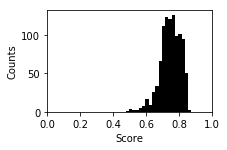

In [7]:
scores = [row[4] for row in table]

plt.figure(figsize=(3, 2))
_ = plt.hist(scores, color='black', bins=20)
_ = plt.tight_layout()
_ = plt.xlim(0, 1)
_ = plt.ylabel("Counts")
_ = plt.xlabel("Score")

## Scores as a fn of other parameters

In [8]:
learning_rates = [row[3] for row in table]

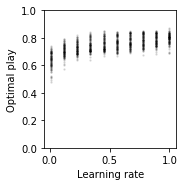

In [19]:
plt.figure(figsize=(2.5, 2.5))
_ = plt.scatter(learning_rates, scores, color='black', alpha=0.1, s=2)
_ = plt.tight_layout()
_ = plt.xlabel("Learning rate")
_ = plt.ylabel("Final optimal play")
_ = plt.ylim(0, 1)

In [10]:
epsilons = [row[2] for row in table]

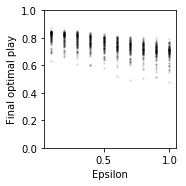

In [21]:
plt.figure(figsize=(2.5, 2.5))
_ = plt.scatter(epsilons, scores, color='black', alpha=0.1, s=2)
_ = plt.tight_layout()
_ = plt.xlabel("Epsilon")
_ = plt.ylabel("Final optimal play")
_ = plt.ylim(0, 1)

In [12]:
gammas = [row[1] for row in table]

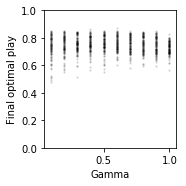

In [20]:
plt.figure(figsize=(2.5, 2.5))
_ = plt.scatter(gammas, scores, color='black', alpha=0.1, s=2)
_ = plt.tight_layout()
_ = plt.xlabel("Gamma")
_ = plt.ylabel("Final optimal play")
_ = plt.ylim(0, 1)